In [8]:
import numpy as np
import pandas as pd


In [10]:
import data.sifa.crime as CRIME

In [14]:
type(CRIME.edu)

dict

In [16]:
CRIME.edu

{0: '研究生及以上',
 1: '大学本科',
 2: '大学专科和专科学校',
 3: '中专或中计',
 4: '技工学校',
 5: '高中',
 6: '初中',
 7: '小学',
 8: '文盲或半文盲'}

In [17]:
CRIME.eduname

{'研究生及以上': 0,
 '大学本科': 1,
 '大学专科和专科学校': 2,
 '中专或中计': 3,
 '技工学校': 4,
 '高中': 5,
 '初中': 6,
 '小学': 7,
 '文盲或半文盲': 8}

In [27]:
data = []
for k,v in (CRIME.edu.items()):
    data.append([k,v])
data
    # print(k,v)

[[0, '研究生及以上'],
 [1, '大学本科'],
 [2, '大学专科和专科学校'],
 [3, '中专或中计'],
 [4, '技工学校'],
 [5, '高中'],
 [6, '初中'],
 [7, '小学'],
 [8, '文盲或半文盲']]

In [28]:
edu_df = pd.DataFrame(data,columns=['num_edu','edu_level'])

In [29]:
print(edu_df)

   num_edu  edu_level
0        0     研究生及以上
1        1       大学本科
2        2  大学专科和专科学校
3        3      中专或中计
4        4       技工学校
5        5         高中
6        6         初中
7        7         小学
8        8     文盲或半文盲


In [31]:
data = []
for k,v in (CRIME.accu.items()):
    data.append([k,v])
accu_df = pd.DataFrame(data,columns=['num_accu','accusation'])

In [37]:
accu_df.to_csv("accu_df")

In [38]:
edu_df.to_csv("edu_df")

In [91]:
allFact, allCrimalInfo, accu_label = CRIME.getData(r'D:\code\pycharm\fairness\data\sifa\crimeData.json')

In [69]:
type(accu_label)

list

In [70]:
accu_label[:5]

[13, 170, 152, 189, 189]

In [71]:
allInfo = list(zip(allFact,allCrimalInfo,accu_label))

In [72]:
type(allInfo)

list

In [74]:
len(allInfo)

19630

In [84]:
type(allFact[0])
# rr.append(1)
# rr.append()

str

In [86]:
count = 0
all_df=[]
for info_one in allInfo:
    info=info_one[1]
    info.append(info_one[0])
    info.append(info_one[2])
    all_df.append(info)


In [93]:
all_df[2]

[0,
 6,
 0,
 0,
 '2018年5月8日23时25分许，被告人李某某酒后无证驾驶无号牌新大洲125型摩托车沿厢城街由东向西行驶至厢城街与文体路交叉路口时，与行人刘某某、高某某相撞，致使刘某某、高某某受伤。经鉴定，被告人李某某血液中检出酒精成分，其含量测定为153.17mg/100ml。',
 152]

In [89]:
columns=['age','edu_level','race','gender','fact','labels']

In [96]:
accu_label[2]

152

In [98]:
allCrime_DF = pd.DataFrame(all_df,columns=columns)

In [100]:
allCrime_DF.iloc[0,:]

age                                                          2
edu_level                                                    2
race                                                         0
gender                                                       0
fact         2018年3月14日16时48分许，被告人李某甲驾驶豫J*****轻型普通货车载王某某，沿南...
labels                                                      13
Name: 0, dtype: object

In [114]:
allCrime_DF.to_csv('allCrimal_df')

In [115]:
read_cri = pd.read_csv('allCrimal_df',index_col=0)

In [116]:
print(read_cri.iloc[0:3])

   age  edu_level  race  gender  \
0    2          2     0       0   
1    2          1     0       0   
2    0          6     0       0   

                                                fact  labels  
0  2018年3月14日16时48分许，被告人李某甲驾驶豫J*****轻型普通货车载王某某，沿南...      13  
1  一、单位行贿罪2012年至2016年期间，时任武汉**公司总经理潘某某（另案处理）为感谢武汉...     170  
2  2018年5月8日23时25分许，被告人李某某酒后无证驾驶无号牌新大洲125型摩托车沿厢城街...     152  


In [118]:
read_cri2 = read_cri.iloc[:,[0,1,2,3,5]]

In [119]:
len(read_cri2)

19630

In [121]:
print(read_cri2.describe())

                age     edu_level          race        gender        labels
count  19630.000000  19630.000000  19630.000000  19630.000000  19630.000000
mean       1.113754      5.736271      0.079674      0.070352    122.312481
std        0.622198      1.572985      0.270795      0.255745     68.701329
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        1.000000      6.000000      0.000000      0.000000     72.000000
50%        1.000000      6.000000      0.000000      0.000000    152.000000
75%        2.000000      7.000000      0.000000      0.000000    189.000000
max        2.000000      8.000000      1.000000      1.000000    210.000000


In [132]:
gb_age = read_cri.groupby(['age'])

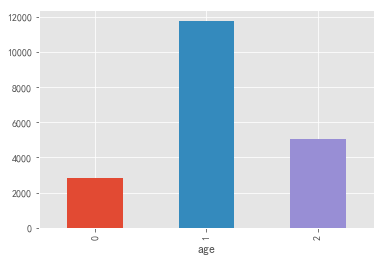

In [260]:

gb_age.size().plot.bar()

In [136]:
gb_sex = read_cri.groupby(['gender'])

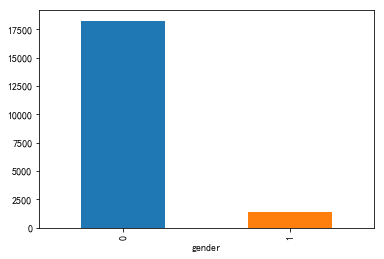

In [137]:
gb_sex.size().plot.bar()

In [138]:
def plot_se(features):
    gb = read_cri.groupby([features])
    gb.size().plot.bar()
    

In [150]:
gb = read_cri.groupby(['labels'])
top = gb.size().sort_values(ascending=False)

In [159]:
top10 = top[:20]

In [160]:
top10

labels
152    4822
189    4078
190    1855
13     1401
72     1217
97      762
1       635
11      564
6       397
0       277
119     184
18      182
185     142
140     133
74      133
9       124
75      124
139     122
7       118
67      111
dtype: int64

In [168]:
top10 = top10.reset_index(name = 'times')

In [170]:
print(top10)

    labels  times
0      152   4822
1      189   4078
2      190   1855
3       13   1401
4       72   1217
5       97    762
6        1    635
7       11    564
8        6    397
9        0    277
10     119    184
11      18    182
12     185    142
13     140    133
14      74    133
15       9    124
16      75    124
17     139    122
18       7    118
19      67    111


In [172]:
import matplotlib.pyplot as plt

<BarContainer object of 20 artists>

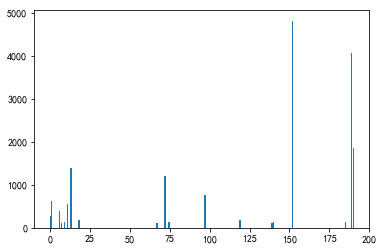

In [177]:
plt.bar(top10.iloc[:,0],top10.iloc[:,1])

In [232]:
name = []
for i,j in zip(top10.iloc[:,0],top10.iloc[:,1]):
    name.append([CRIME.accu[i],int(j)])
    print(CRIME.accu[i],'--',j)

危险驾驶 -- 4822
盗窃 -- 4078
故意伤害 -- 1855
交通肇事 -- 1401
走私、贩卖、运输、制造毒品 -- 1217
诈骗 -- 762
寻衅滋事 -- 635
容留他人吸毒 -- 564
开设赌场 -- 397
妨害公务 -- 277
非法持有、私藏枪支、弹药 -- 184
抢劫 -- 182
信用卡诈骗 -- 142
非法拘禁 -- 133
赌博 -- 133
非法持有毒品 -- 124
非法经营 -- 124
故意毁坏财物 -- 122
聚众斗殴 -- 118
非法吸收公众存款 -- 111


In [236]:
name

[['危险驾驶', 4822],
 ['盗窃', 4078],
 ['故意伤害', 1855],
 ['交通肇事', 1401],
 ['走私、贩卖、运输、制造毒品', 1217],
 ['诈骗', 762],
 ['寻衅滋事', 635],
 ['容留他人吸毒', 564],
 ['开设赌场', 397],
 ['妨害公务', 277],
 ['非法持有、私藏枪支、弹药', 184],
 ['抢劫', 182],
 ['信用卡诈骗', 142],
 ['非法拘禁', 133],
 ['赌博', 133],
 ['非法持有毒品', 124],
 ['非法经营', 124],
 ['故意毁坏财物', 122],
 ['聚众斗殴', 118],
 ['非法吸收公众存款', 111]]

In [247]:
namea = np.array(name)

In [250]:
type(namea)
namea[:,1].astype(np.int)

array([4822, 4078, 1855, 1401, 1217,  762,  635,  564,  397,  277,  184,
        182,  142,  133,  133,  124,  124,  122,  118,  111])

In [253]:
sum=[int(i) for i in namea[:,1]]

In [254]:
ave = np.mean(sum)

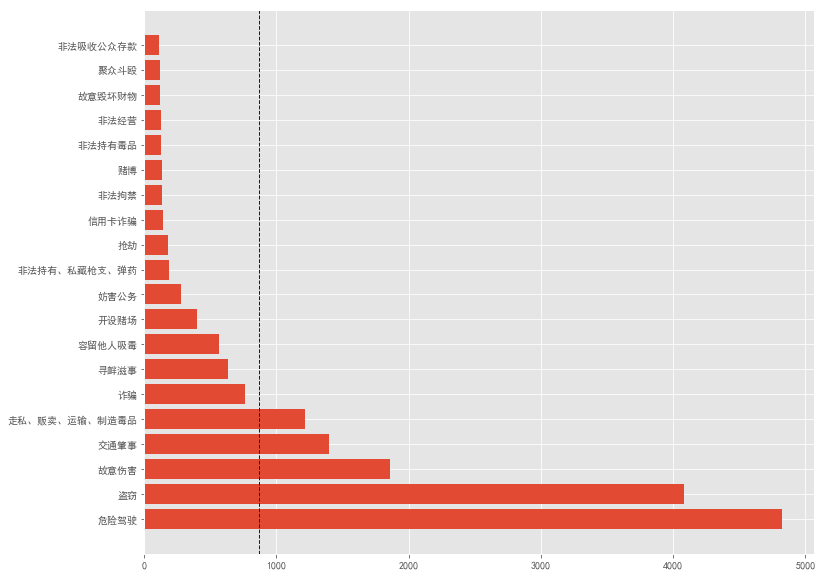

In [258]:
plt.figure(figsize=(12,10))
plt.axvline(x=ave, color='b', linestyle='--', linewidth=1)
plt.barh(namea[:,0],namea[:,1].astype(np.int))
plt.show()

In [266]:
gb2 = read_cri.groupby(['gender','labels'])
gb2.size().sort_values(ascending=False)

gender  labels
0       152       4741
        189       3822
        190       1768
        13        1338
        72        1071
        97         655
        1          618
        11         512
        6          320
1       189        256
0       0          231
        119        184
        18         178
1       72         146
0       140        122
        7          117
        9          115
        139        112
        185        110
        75         110
1       97         107
0       74         102
        73         101
        16          90
1       190         87
        152         81
        6           77
0       200         75
        117         72
        187         71
                  ... 
        151          1
        153          1
1       7            1
        204          1
0       174          1
1       102          1
0       209          1
        178          1
        208          1
        207          1
        183          1
        188        

In [267]:
read_cri22 = pd.read_csv('allCrimal_df',index_col=0)

In [269]:
read_cri22.iloc[0]

age                                                          2
edu_level                                                    2
race                                                         0
gender                                                       0
fact         2018年3月14日16时48分许，被告人李某甲驾驶豫J*****轻型普通货车载王某某，沿南...
labels                                                      13
Name: 0, dtype: object

In [281]:
read_cri22_top2 = read_cri22[read_cri22['labels'].isin([152,13])]

In [282]:
len(read_cri22_top5)

6223

In [283]:
gb3 = read_cri.groupby(['labels'])
gb3.size().sort_values(ascending=False)

labels
152    4822
189    4078
190    1855
13     1401
72     1217
97      762
1       635
11      564
6       397
0       277
119     184
18      182
185     142
140     133
74      133
9       124
75      124
139     122
7       118
67      111
73      105
16      100
48       83
200      81
182      81
187      78
117      74
22       70
201      69
149      67
       ... 
126       2
167       2
94        2
123       2
159       2
151       1
153       1
207       1
124       1
143       1
137       1
134       1
133       1
132       1
208       1
53        1
118       1
55        1
114       1
209       1
111       1
30        1
174       1
178       1
76        1
183       1
188       1
60        1
49        1
210       1
Length: 139, dtype: int64

In [297]:
gb4 = read_cri22_top2.groupby(['labels','gender'])
gb4.size().sort_values(ascending=False)

labels  gender
152     0         4741
13      0         1338
152     1           81
13      1           63
dtype: int64

In [287]:
print(read_cri22_top2.iloc[:10])

    age  edu_level  race  gender  \
0     2          2     0       0   
2     0          6     0       0   
5     1          6     0       0   
10    0          6     0       0   
19    2          6     0       0   
20    1          1     0       0   
21    1          7     0       0   
24    1          1     0       1   
25    1          6     0       0   
26    1          6     0       0   

                                                 fact  labels  
0   2018年3月14日16时48分许，被告人李某甲驾驶豫J*****轻型普通货车载王某某，沿南...      13  
2   2018年5月8日23时25分许，被告人李某某酒后无证驾驶无号牌新大洲125型摩托车沿厢城街...     152  
5   2018年4月3日21时55分许，被告人余某某酒后无证驾驶皖K*****号轿车行驶至淮南市毛...     152  
10  2018年3月14日下午5时许，被告人某某甲驾驶赣C****3号重型普通货车从平塘县通州镇方...      13  
19  2017年9月2日7时许，被告人桑某某酒后驾驶鲁******牌小型客车沿本市市中区九曲庄路由...     152  
20  2016年7月17日7时许，被告人张某某酒后驾驶辽B****8小型越野客车行经大连市中山区*...     152  
21  2018年05月17日21时许，被告人林某某酒后驾驶陕K****K“长城”牌小型普通客车，沿...     152  
24  2018年2月20日18时30分左右，被告人丛某某驾驶苏AS****号小型越野客车，沿如东X...      13  
25  2018年5月11日2时许，被告人王某某酒后驾

In [293]:
read_cri22_top2.to_csv('trific2',index=False)

In [294]:
trafic_fact = read_cri22_top2['fact']

In [296]:
print(len(trafic_fact))

6223


In [298]:
trafic_values = trafic_fact.values

In [304]:
import jieba
def seq2vec(trafic_fact):
    all_texts = []
    stopword = open(r'D:\code\pycharm\fairness\data\sifa\stopword.txt','r',encoding='utf-8')
    stopword_dict = [word.strip() for word in stopword.readlines()]
    for fact in trafic_fact:
        outstr = ''
        result = jieba.cut(fact)
        for word in result:
            if word not in stopword_dict:
                outstr+=word
                outstr+=' '
        all_texts.append(outstr)
    return all_texts

In [308]:
trafic_vec = seq2vec(trafic_values)

In [309]:
len(trafic_vec)

6223

In [310]:
from keras.preprocessing.text import Tokenizer
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
def vec2bow(trafic_vec):
    tokenizer = Tokenizer(num_words=2000)
    tokenizer.fit_on_texts(trafic_vec)
    trafic_vec_seq = tokenizer.texts_to_sequences(trafic_vec)
    trafic_fact = sequence.pad_sequences(trafic_vec_seq,maxlen=150)
    return trafic_fact

Using TensorFlow backend.


In [311]:
trafic_bow = vec2bow(trafic_vec)

In [313]:
len(trafic_bow)

6223

In [315]:
trafic_labels = read_cri22_top2['labels']

In [317]:
len(trafic_labels)

6223

In [318]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(trafic_bow, trafic_labels, test_size=0.33, random_state=2)

In [319]:
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [320]:
pred = model_svc.predict(X_test)

In [338]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

         13       0.00      0.00      0.00       425
        152       0.79      1.00      0.88      1629

avg / total       0.63      0.79      0.70      2054



In [355]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# accuracy_score(y_test,pred)
print(confusion_matrix(y_test,pred))

[[   0  425]
 [   0 1629]]


In [332]:
pred2 = model_svc.predict(X_train)

In [335]:
confusion_matrix(y_train,pred2)

array([[ 976,    0],
       [   0, 3193]], dtype=int64)

In [337]:
trafic_bow[:10]

array([[  0,   0,   0, ..., 603,  17,  20],
       [  0,   0,   0, ..., 151,  18,   8],
       [  0,   0,   0, ...,  24,   2,  41],
       ...,
       [  0,   0,   0, ...,  17,  20, 182],
       [  0,   0,   0, ...,   8,  24, 337],
       [  0,   0,   0, ...,  88,  18,   8]])

In [357]:
cfm = confusion_matrix(y_test,pred)

In [358]:
cfm

array([[   0,  425],
       [   0, 1629]], dtype=int64)

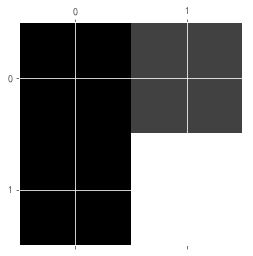

In [361]:
import matplotlib.pyplot as plt
plt.matshow(cfm,cmap=plt.cm.gray)
plt.show()

In [363]:
#计算每一行的总值
row_sums = np.sum(cfm,axis=1)
err_matrix = cfm/row_sums
#对err_matrix矩阵的对角线置0，因为这是预测正确的部分，不关心
np.fill_diagonal(err_matrix,0)
err_matrix

array([[0.        , 0.26089626],
       [0.        , 0.        ]])

In [374]:
y_test.value_counts()

152    1629
13      425
Name: labels, dtype: int64